# Required Installations

In [ ]:
!pip install elasticsearch==7.14.0
!apt install default-jdk > /dev/null
!wget https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.0.0-linux-x86_64.tar.gz -q
!tar -xzf elasticsearch-7.0.0-linux-x86_64.tar.gz
!chown -R daemon:daemon elasticsearch-7.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.2/364.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4




In [ ]:
!wget https://trec.nist.gov/trec_eval/trec_eval-9.0.7.tar.gz
!tar xvfz trec_eval-9.0.7.tar.gz
!cd trec_eval-9.0.7 && make

--2023-08-29 13:02:56--  https://trec.nist.gov/trec_eval/trec_eval-9.0.7.tar.gz
Resolving trec.nist.gov (trec.nist.gov)... 129.6.13.19, 2610:20:6005:13::19
Connecting to trec.nist.gov (trec.nist.gov)|129.6.13.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181743 (177K) [application/x-gzip]
Saving to: ‘trec_eval-9.0.7.tar.gz’

trec_eval-9.0.7.tar 100%[===================>] 177.48K   753KB/s    in 0.2s    

2023-08-29 13:02:57 (753 KB/s) - ‘trec_eval-9.0.7.tar.gz’ saved [181743/181743]

trec_eval-9.0.7/
trec_eval-9.0.7/CHANGELOG
trec_eval-9.0.7/Makefile
trec_eval-9.0.7/README
trec_eval-9.0.7/README.windows.md
trec_eval-9.0.7/bpref_bug
trec_eval-9.0.7/common.h
trec_eval-9.0.7/convert_zscores.c
trec_eval-9.0.7/form_prefs_counts.c
trec_eval-9.0.7/form_res_rels.c
trec_eval-9.0.7/form_res_rels_jg.c
trec_eval-9.0.7/formats.c
trec_eval-9.0.7/functions.h
trec_eval-9.0.7/get_prefs.c
trec_eval-9.0.7/get_qrels.c
trec_eval-9.0.7/get_qrels_jg.c
trec_eval-9.0.7/get_qrels_

In [ ]:
!pip install git+https://github.com/naver/splade.git#egg=splade

  Cloning https://github.com/naver/splade.git to /tmp/pip-install-0140gqgw/splade_5170796e4a2e480492e11d47e616b470
  Running command git clone --filter=blob:none --quiet https://github.com/naver/splade.git /tmp/pip-install-0140gqgw/splade_5170796e4a2e480492e11d47e616b470
  Resolved https://github.com/naver/splade.git to commit 3781228d5f07e7a6ae14a479e469a715de79e976
  Preparing metadata (setup.py) ... done


In [ ]:
# Download the data and decrpyt
# TODO: set <PASSPHRASE>
!wget https://www.dropbox.com/s/n4dks2naim2t716/aila20-task1.tar.gz.gpg?dl=0 && mv aila20-task1.tar.gz.gpg?dl=0 aila20-task1.tar.gz.gpg
!gpg --pinentry-mode=loopback --passphrase <PASSPHRASE> --output aila20-task1.tar.gz --decrypt aila20-task1.tar.gz.gpg
!tar xzf aila20-task1.tar.gz

--2023-08-29 13:04:01--  https://www.dropbox.com/s/n4dks2naim2t716/aila20-task1.tar.gz.gpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/n4dks2naim2t716/aila20-task1.tar.gz.gpg [following]
--2023-08-29 13:04:01--  https://www.dropbox.com/s/raw/n4dks2naim2t716/aila20-task1.tar.gz.gpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc29c8369179a41ce8099c68cda3.dl.dropboxusercontent.com/cd/0/inline/CCs4MoToRaG5kIUiHz-sLJSYgWQ_kJG4wE4ILFgcS39nyOn1sHkJREyPQWTtiHdW9HSzw3R6Dpmn74SyqUxnIlI0h5a4Fz1tRxkMfJTJsXzWTod8-dc-ulnKr-TojH-3LVM/file# [following]
--2023-08-29 13:04:02--  https://uc29c8369179a41ce8099c68cda3.dl.dropboxusercontent.com/cd/0/inline/CCs4MoToRaG5kIUiHz-sLJSYgWQ_kJG4wE4ILFgcS39nyOn1sHkJREyPQWTtiHdW9HSzw3R6Dpmn74SyqUxnI

# Starting Elasticsearch

In [ ]:
try:
  import os
  import elasticsearch
  from elasticsearch import Elasticsearch
  import numpy as np
  import pandas as pd
  import sys
  import json
  from ast import literal_eval
  from tqdm import tqdm
  import datetime
  from elasticsearch import helpers

except Exception as e:
  print(f"error: {e}")

In [ ]:
import os
from subprocess import Popen, PIPE, STDOUT
es_server = Popen(['elasticsearch-7.0.0/bin/elasticsearch'],
                  stdout=PIPE, stderr=STDOUT,
                  preexec_fn=lambda: os.setuid(1)  # as daemon
                 )

In [ ]:
# elasticsearch needs some time to start, so this won't work immediately
!curl localhost:9200

{
  "name" : "b5a439af07e1",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "aU0pVdk8S_OgZVb3fpQUdA",
  "version" : {
    "number" : "7.0.0",
    "build_flavor" : "default",
    "build_type" : "tar",
    "build_hash" : "b7e28a7",
    "build_date" : "2019-04-05T22:55:32.697037Z",
    "build_snapshot" : false,
    "lucene_version" : "8.0.0",
    "minimum_wire_compatibility_version" : "6.7.0",
    "minimum_index_compatibility_version" : "6.0.0-beta1"
  },
  "tagline" : "You Know, for Search"
}


# Basic Elasticsearch

## Data Loading and Indexing
Write functions for iterating through the statute documents and converting them into an Elasticsearch compatible document format (i.e. a dictionary with a field containing the document data).
Also create a mapping for the index that defines the type of the field, which analyzer and which similarity function is used.
For examples and further information, considere reading through [the ES mapping documentation](https://www.elastic.co/guide/en/elasticsearch/reference/7.0/mapping.html) and possibly the [ES Python documentation](https://elasticsearch-py.readthedocs.io/en/v7.14.0/)

In [ ]:
#####################################
### TODO
#####################################

import os

documents_path = "dataset/Object_statutes"
queries_path = "dataset/Query_doc.txt"
eval_path = "relevance_judgements/task1b_rel_judgements.txt"
INDEX_NAME = "task1b_base"


def doc_iterator(documents_path):
  # TODO
  pass


mapping = {
  # TODO
}

data = [(doc_id, doc) for doc_id, doc in doc_iterator(documents_path)]

In [ ]:
#####################################
### IMPLEMENTATION
#####################################

import os

documents_path = "dataset/Object_statutes"
queries_path = "dataset/Query_doc.txt"
eval_path = "relevance_judgements/task1b_rel_judgements.txt"
INDEX_NAME = "task1b_base"


def doc_iterator(documents_path):
  for doc_name in os.listdir(documents_path):
    with open(os.path.join(documents_path, doc_name), "r") as fp:
      doc_string = fp.read()
      yield os.path.splitext(doc_name)[0], {
          'contents': doc_string
      }

mapping = {
    "mappings": {
        "properties": {
            "contents": {
                "type": "text",
                "analyzer": "standard",
                "similarity": "BM25"
            }
        }
    }
}

data = [(doc_id, doc) for doc_id, doc in doc_iterator(documents_path)]

In [ ]:
import elasticsearch
from tqdm import tqdm
from elasticsearch import helpers
print(elasticsearch.__version__)
print(elasticsearch.__versionstr__)
class ElasticSearch:
	def __init__(self):
		# configure elasticsearch
		config = {
			"localhost": 9200
		}
		self.es = elasticsearch.Elasticsearch([config, ], timeout=30)
		self.last_scroll_id = None

	def create_index(self, name, mapping, replace=False):
		if replace:
			self.delete_index(name)
		print("creating index, name: ", name)
		self.es.indices.create(index=name, body=mapping)
		print("index created successfully, index name: " + name)

	def delete_index(self, name):
		print("deleting index, name: ", name)
		self.es.indices.delete(index=name, ignore=[400, 404])
		print("index deleted successfully, index name: " + name)

	def index(self, documents, index_name):
		for doc_id, doc in tqdm(documents):
			self.es.index(index=index_name, id=doc_id, body=doc)

	def search(self, index, body):
		try:
			# make the bulk call, and get a response
			return self.es.search(index=index, body=body)
		except Exception as e:
			print("\nERROR:", e)

(7, 14, 0)
7.14.0


In [ ]:
def index_documents(index_name, documents):
  es = ElasticSearch()
  print(f"indexer run..  index_name: {index_name}")
  print("creating index mapping...")
  es.create_index(index_name, mapping, replace=True)
  print("index mapping created !")
  es.index(index_name=index_name, documents=documents)

index_documents(index_name=INDEX_NAME, documents=data)

indexer run..  index_name: task1b_base
creating index mapping...
deleting index, name:  task1b_base
index deleted successfully, index name: task1b_base
creating index, name:  task1b_base
index created successfully, index name: task1b_base
index mapping created !


100%|██████████| 197/197 [00:03<00:00, 55.68it/s]


## Queries
Write functions for iterating through the query document and converting the queries into an Elasticsearch compatible boolean query dictionary that queries the same field as defined in the above mapping. You should also convert the query full text to keywords. You can make use of a simple function like the existing `get_keyword_query` function, or write your own to shorten the query.
For examples and further information, considere reading through [the ES boolean query documentation](https://www.elastic.co/guide/en/elasticsearch/reference/7.0/query-dsl-bool-query.html)

In [ ]:
#####################################
### TODO
#####################################

def query_iter(queries_path):
  # TODO
  pass

def get_keyword_query(query_text):
  query_tokens = set()
  for token in query_text.lower().split():
    query_tokens.add(token)
  return " ".join(query_tokens)

queries = [(query_id, bool_query) for query_id, bool_query in query_iter(queries_path)]

In [ ]:
#####################################
### IMPLEMENTATION
#####################################

def query_iter(queries_path):
  with open(queries_path, "r") as fp:
    for query_line in fp:
      query_id, query_text = query_line.split('||')
      bool_query = {
          "size": 100,
          "query": {
              "bool": {
                  "should": [
                      {"match": {'contents': get_keyword_query(query_text)}}
                  ],
                  "minimum_should_match": 0,
                  "boost": 1.0
              }
          }
      }
      yield query_id, bool_query

def get_keyword_query(query_text):
  query_tokens = set()
  for token in query_text.lower().split():
    query_tokens.add(token)
  return " ".join(query_tokens)

queries = [(query_id, bool_query) for query_id, bool_query in query_iter(queries_path)]

In [ ]:
def	rank(index_name, queries, output_path):
  report = {}
  es = ElasticSearch()
  cnt = 0
  with open(output_path, "w") as fp:
    for query_id, query_body in queries:
      try:
        candidates = es.search(index=index_name, body=query_body)
        for rank, candidate in enumerate(candidates['hits']['hits']):
          document_id = candidate["_id"]
          score = candidate["_score"]
          trec_text = f"{query_id} Q0 {document_id} {rank} {score} base\n"
          fp.write(trec_text)
      except:
        print(query_id, query_body)

rank(index_name=INDEX_NAME, queries=queries, output_path="base_run.txt")

In [ ]:
!trec_eval-9.0.7/trec_eval relevance_judgements/task1b_rel_judgements.txt base_run.txt

runid                 	all	base
num_q                 	all	50
num_ret               	all	5000
num_rel               	all	221
num_rel_ret           	all	97
map                   	all	0.0605
gm_map                	all	0.0138
Rprec                 	all	0.0490
bpref                 	all	0.0391
recip_rank            	all	0.1864
iprec_at_recall_0.00  	all	0.1923
iprec_at_recall_0.10  	all	0.1923
iprec_at_recall_0.20  	all	0.1923
iprec_at_recall_0.30  	all	0.0611
iprec_at_recall_0.40  	all	0.0598
iprec_at_recall_0.50  	all	0.0333
iprec_at_recall_0.60  	all	0.0196
iprec_at_recall_0.70  	all	0.0125
iprec_at_recall_0.80  	all	0.0047
iprec_at_recall_0.90  	all	0.0025
iprec_at_recall_1.00  	all	0.0025
P_5                   	all	0.0480
P_10                  	all	0.0380
P_15                  	all	0.0320
P_20                  	all	0.0320
P_30                  	all	0.0280
P_100                 	all	0.0194
P_200                 	all	0.0097
P_500                 	all	0.0039
P_1000                	all	0.

In [ ]:
!trec_eval-9.0.7/trec_eval -m recall relevance_judgements/task1b_rel_judgements.txt base_run.txt

recall_5              	all	0.0540
recall_10             	all	0.0860
recall_15             	all	0.1070
recall_20             	all	0.1450
recall_30             	all	0.1927
recall_100            	all	0.4373
recall_200            	all	0.4373
recall_500            	all	0.4373
recall_1000           	all	0.4373


# Splade

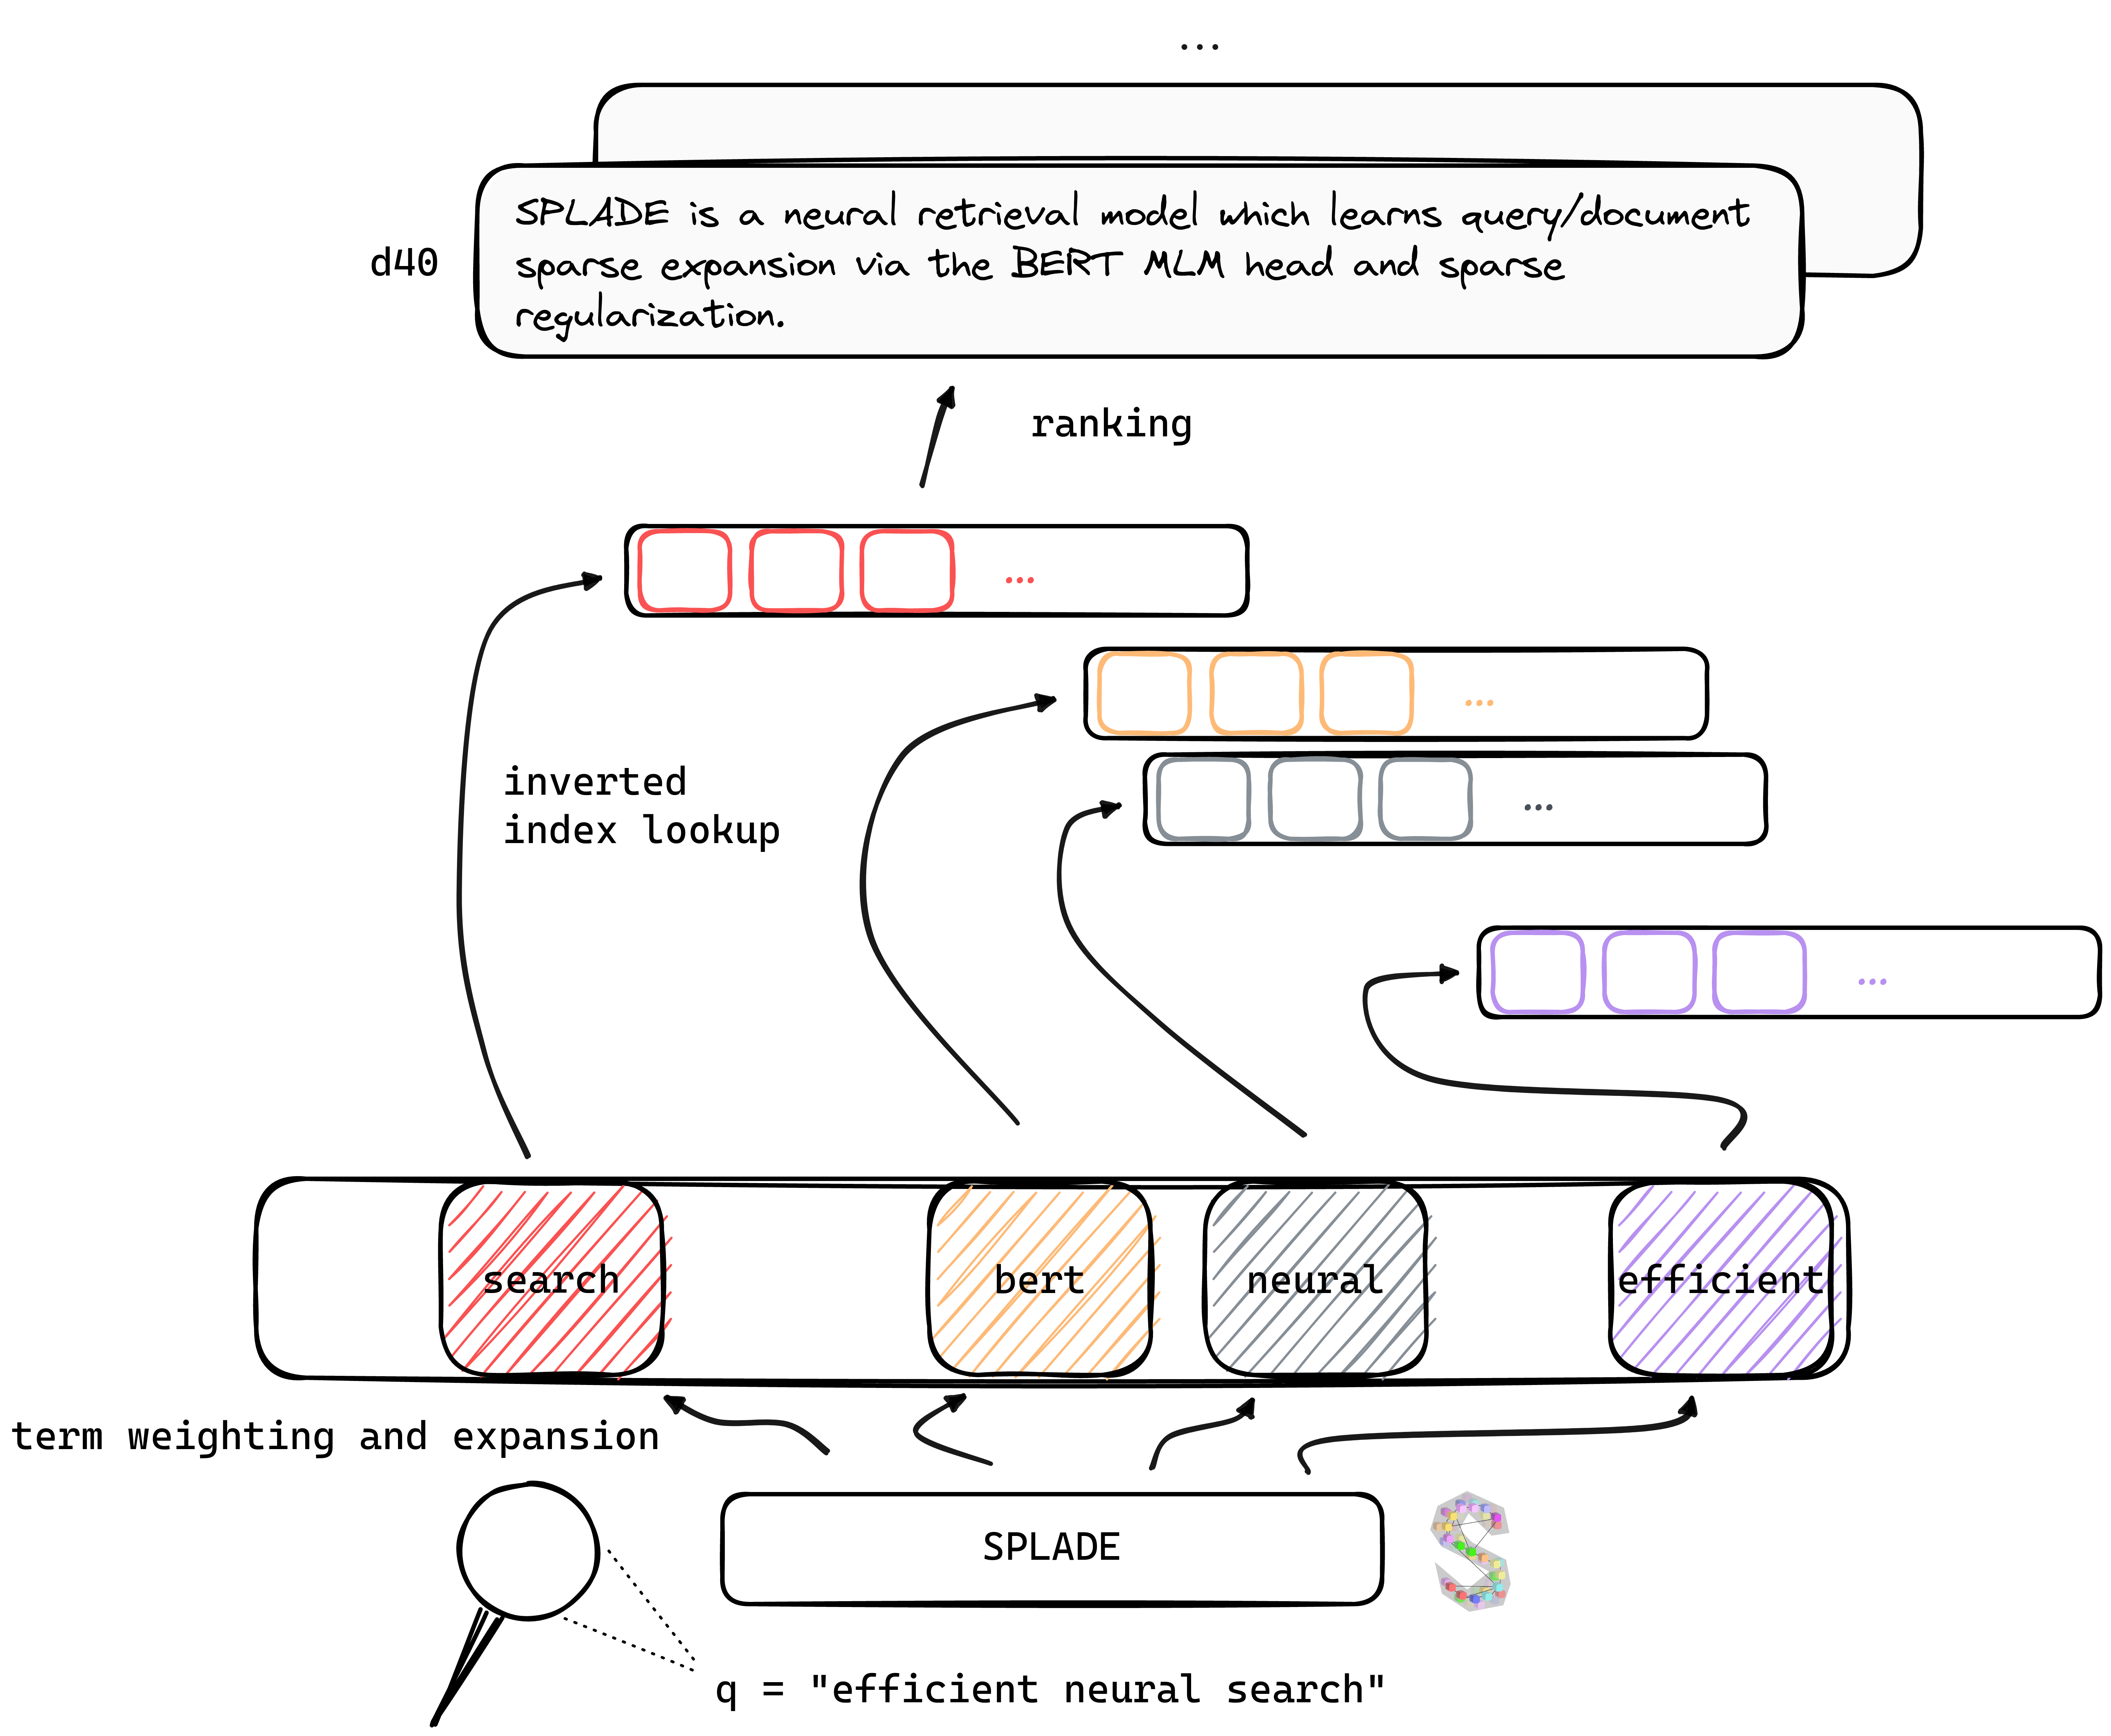
SPLADE is a neural retrieval model which learns query/document sparse expansion via the BERT MLM head and sparse regularization. Sparse representations benefit from several advantages compared to dense approaches: efficient use of inverted index, explicit lexical match, interpretability... They also seem to be better at generalizing on out-of-domain data (BEIR benchmark).
See also on [Github](https://github.com/naver/splade)

In [ ]:

import torch
from transformers import AutoModelForMaskedLM, AutoTokenizer
from splade.models.transformer_rep import Splade

In [ ]:
# set the dir for trained weights

##### v2
# model_type_or_dir = "naver/splade_v2_max"
# model_type_or_dir = "naver/splade_v2_distil"

### v2bis, directly download from Hugging Face
# model_type_or_dir = "naver/splade-cocondenser-selfdistil"
model_type_or_dir = "naver/splade-cocondenser-ensembledistil"

In [ ]:

# loading model and tokenizer

model = Splade(model_type_or_dir, agg="max")
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_type_or_dir)
reverse_voc = {v: k for k, v in tokenizer.vocab.items()}

Downloading:   0%|          | 0.00/670 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
doc = "Glass and Thermal Stress. Thermal Stress is created when one area of a glass pane gets hotter than an adjacent area. If the stress is too great then the glass will crack. The stress level at which the glass will break is governed by several factors."
#doc = "Glass and Thermal Stress."

In [ ]:
def get_sparse_document(doc_string, bow_rep_token_strings=True, weight_factor=1.0):
  # now compute the document representation
  with torch.no_grad():
      doc_rep = model(d_kwargs=tokenizer(doc_string, max_length=512, truncation=True, return_tensors="pt"))["d_rep"].squeeze()  # (sparse) doc rep in voc space, shape (30522,)

  # get the number of non-zero dimensions in the rep:
  col = torch.nonzero(doc_rep).squeeze().cpu().tolist()

  # now let's inspect the bow representation:
  weights = doc_rep[col].cpu().tolist()
  d = {k: v*weight_factor for k, v in zip(col, weights)}
  sorted_d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
  bow_rep = []
  for k, v in sorted_d.items():
    if bow_rep_token_strings:
      bow_rep.append((reverse_voc[k], round(v, 2)))
    else:
      bow_rep.append((k, round(v, 2)))
  return bow_rep


print("SPLADE BOW rep:\n", get_sparse_document(doc))

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


SPLADE BOW rep:
 [('stress', 2.25), ('glass', 2.23), ('thermal', 2.18), ('glasses', 1.65), ('pan', 1.62), ('heat', 1.56), ('stressed', 1.42), ('crack', 1.31), ('break', 1.12), ('cracked', 1.1), ('hot', 0.93), ('created', 0.9), ('factors', 0.81), ('broken', 0.73), ('caused', 0.71), ('too', 0.71), ('damage', 0.69), ('if', 0.68), ('hotter', 0.65), ('governed', 0.61), ('heating', 0.59), ('temperature', 0.59), ('adjacent', 0.59), ('cause', 0.58), ('effect', 0.57), ('fracture', 0.56), ('bradford', 0.55), ('strain', 0.53), ('hammer', 0.51), ('brian', 0.48), ('error', 0.47), ('windows', 0.45), ('will', 0.45), ('reaction', 0.42), ('create', 0.42), ('windshield', 0.41), ('heated', 0.41), ('factor', 0.4), ('cracking', 0.39), ('failure', 0.38), ('mechanical', 0.38), ('when', 0.38), ('formed', 0.38), ('bolt', 0.38), ('mechanism', 0.37), ('warm', 0.37), ('areas', 0.36), ('area', 0.36), ('energy', 0.34), ('disorder', 0.33), ('barry', 0.33), ('shock', 0.32), ('determined', 0.32), ('gage', 0.32), ('sas

## Data Loading and Indexing
Write functions for iterating through the statute documents and create a sparse document representation using `get_sparse_document`. Then convert them into an Elasticsearch compatible dictionary.
Also create a mapping for the index that defines the type of the field.
For examples and further information, considere reading through [the ES rank features datatype documentation](https://www.elastic.co/guide/en/elasticsearch/reference/7.0/rank-features.html) and [the ES rank feature query documentation](https://www.elastic.co/guide/en/elasticsearch/reference/7.0/query-dsl-rank-feature-query.html)

In [ ]:
#####################################
### TODO
#####################################

import os

documents_path = "dataset/Object_statutes"
INDEX_NAME = "task1b_splade"

def sparse_doc_iterator(documents_path):
  # TODO
  pass


mapping = {
    # TODO
}

data = [(doc_id, doc) for doc_id, doc in sparse_doc_iterator(documents_path)]

In [ ]:
#####################################
### IMPLEMENTATION
#####################################

import os

documents_path = "dataset/Object_statutes"
INDEX_NAME = "task1b_splade"

def sparse_doc_iterator(documents_path):
  for doc_name in tqdm(os.listdir(documents_path)):
    with open(os.path.join(documents_path, doc_name), "r") as fp:
      doc_string = fp.read()
      bow_rep = get_sparse_document(doc_string, bow_rep_token_strings=False, weight_factor=10)
      sparse_text = {f"feature_{k}":v for k,v in bow_rep if v > 0}
      yield os.path.splitext(doc_name)[0], {
          'contents': doc_string,
          'sparse_text': sparse_text
      }


mapping = {
    "mappings": {
        "properties": {
            "contents": {
                "type": "text",
                "analyzer": "standard",
                "similarity": "BM25"
            },
            "sparse_text": {
                "type": "rank_features"
            }
        }
    }
}

data = [(doc_id, doc) for doc_id, doc in sparse_doc_iterator(documents_path)]

100%|██████████| 197/197 [05:04<00:00,  1.54s/it]


## Queries
Write functions for iterating through the query document and converting the queries into an Elasticsearch compatible boolean query dictionary that queries the `ranked_features` field. You should also convert the query full text to keywords, making use of the `get_sparse_document` function.

In [ ]:
#####################################
### TODO
#####################################

def iter_queries_splade(queries_path):
  # TODO
  pass

queries = [(query_id, bool_query) for query_id, bool_query in iter_queries_splade(queries_path)]

In [ ]:
#####################################
### IMPLEMENTATION
#####################################

def iter_queries_splade(queries_path):
  with open(queries_path, "r") as fp:
    for query_line in tqdm(fp):
      query_id, query_text = query_line.split('||')
      bow_rep = get_sparse_document(query_text, bow_rep_token_strings=False)
      should_query = [should_query_template(f"feature_{token}", weight) for token, weight in bow_rep if weight > 0]
      bool_query = {
          "size": 100,
          "query": {
              "bool": {
                  "should": should_query,
              }
          }
      }
      yield query_id, bool_query


def should_query_template(token, weight):
  return {
    "rank_feature": {
      "field": f"sparse_text.{token}",
      "boost": weight
    }
  }

queries = [(query_id, bool_query) for query_id, bool_query in iter_queries_splade(queries_path)]

50it [02:08,  2.56s/it]


In [ ]:
index_documents(index_name=INDEX_NAME, documents=data)

indexer run..  index_name: task1b_splade
creating index mapping...
deleting index, name:  task1b_splade
index deleted successfully, index name: task1b_splade
creating index, name:  task1b_splade
index created successfully, index name: task1b_splade
index mapping created !


100%|██████████| 197/197 [00:03<00:00, 62.02it/s]


In [ ]:
rank(index_name=INDEX_NAME, queries=queries, output_path="splade_run.txt")

In [ ]:
!trec_eval-9.0.7/trec_eval relevance_judgements/task1b_rel_judgements.txt splade_run.txt

runid                 	all	base
num_q                 	all	50
num_ret               	all	5000
num_rel               	all	221
num_rel_ret           	all	161
map                   	all	0.1060
gm_map                	all	0.0579
Rprec                 	all	0.0830
bpref                 	all	0.0633
recip_rank            	all	0.2572
iprec_at_recall_0.00  	all	0.2679
iprec_at_recall_0.10  	all	0.2679
iprec_at_recall_0.20  	all	0.2679
iprec_at_recall_0.30  	all	0.1202
iprec_at_recall_0.40  	all	0.1168
iprec_at_recall_0.50  	all	0.0971
iprec_at_recall_0.60  	all	0.0587
iprec_at_recall_0.70  	all	0.0496
iprec_at_recall_0.80  	all	0.0322
iprec_at_recall_0.90  	all	0.0183
iprec_at_recall_1.00  	all	0.0183
P_5                   	all	0.0880
P_10                  	all	0.0700
P_15                  	all	0.0587
P_20                  	all	0.0520
P_30                  	all	0.0480
P_100                 	all	0.0322
P_200                 	all	0.0161
P_500                 	all	0.0064
P_1000                	all	0

In [ ]:
!trec_eval-9.0.7/trec_eval -m recall relevance_judgements/task1b_rel_judgements.txt splade_run.txt

recall_5              	all	0.1080
recall_10             	all	0.1667
recall_15             	all	0.2067
recall_20             	all	0.2437
recall_30             	all	0.3347
recall_100            	all	0.7257
recall_200            	all	0.7257
recall_500            	all	0.7257
recall_1000           	all	0.7257
